<a href="https://colab.research.google.com/github/shimjaeman/PyTorch-Tutorials/blob/main/01_Pytorch_Tensor_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor Tutorial
1. 1D : Vector

2. 2D : Matrix
  - ltl = (batch size, dim)
  
3. 3D : Tensor
  - ltl = (batch size, width, height)
  - ltl [NLP] = (batch size, length, dim)

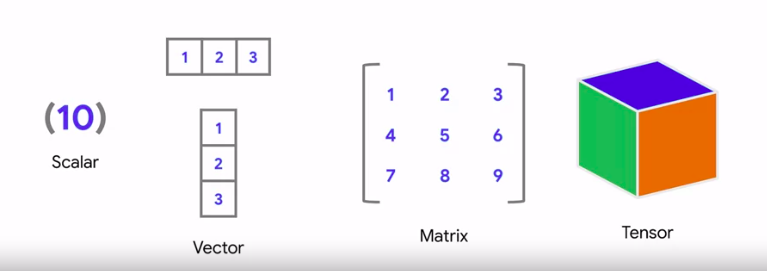

In [ ]:
! pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import torch

## Initializing Tensor

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
my_device = torch.tensor ([[1,2,3,], [4,5,6]], dtype=torch.float32, device=device, requires_grad=True)
# device : "cpu" / "cuda"
# requires_grad=True : 텐서에 대한 기울기를 저장
# dtype : 반환된 텐서의 원하는 데이터 유형

In [ ]:
print(my_device)
print("*"*60)
print(my_device.dim)
print("*"*60)
print(my_device.dtype)
print("*"*60)
print(my_device.shape)
print("*"*60)
print(my_device.requires_grad)

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)
************************************************************
<built-in method dim of Tensor object at 0x7fe7eb160cc0>
************************************************************
torch.float32
************************************************************
torch.Size([2, 3])
************************************************************
True


## Other common initialization methods

> tensor 만들기

1) uninitialized  : torch.empty(5,3) # size 

2) randomly initialized : torch.rand(5,3)

3) 0으로 된 텐서 : torch.zeros(5,3, dtype=torch.long) 

4) 데이터 직접 입력 : torch.tensor([1,2])

5) 기존 텐서 이용 : 

In [ ]:
# empty : 주어진 크기의 아무값으로도 초기화되지 않은 텐서 생성
a = torch.empty(size=(3,3))
print(a)

tensor([[4.0092e-34, 0.0000e+00, 3.5032e-44],
        [0.0000e+00,        nan, 6.0000e+00],
        [1.1578e+27, 7.1463e+22, 4.6241e+30]])


In [ ]:
# zeros : 0으로 된 텐서 
b = torch.zeros((3,3))
print(b)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# ones : 1로 된 텐서
c = torch.ones((3,3))
print(c)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
# eye : 대각선에 1이 있고 다른 곳에는 0으로 채워진 행렬
d = torch.eye(3,3)
print(d)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [ ]:
# arrange : start부터 end까지 step 간격으로 1차원 크기의 텐서를 반환
e = torch.arange(start=0, end=10, step=1)
print(e)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
# linspace : start부터 end까지 steps의 개수만큼 1차원 텐서 반환
f = torch.linspace(start=0, end=5, steps=10)
print(f)

tensor([0.0000, 0.5556, 1.1111, 1.6667, 2.2222, 2.7778, 3.3333, 3.8889, 4.4444,
        5.0000])


In [ ]:
# normal_ : 매개변수화된 정규 분포의 평균과 표준분포 요소 샘플로 텐서 생성
g = torch.empty(size=(3,3)).normal_(mean=0, std=1)
print(g)

tensor([[-0.4631,  1.4697,  0.8741],
        [ 0.3391,  1.2695,  0.0636],
        [-1.1762, -0.0515, -1.1569]])


In [ ]:
# uniform_ : 연속 균일 분포에서 샘플링된 숫자로 텐서 생성
h = torch.empty(size=(3,3)).uniform_(0,1)
print(h)

tensor([[0.3097, 0.7041, 0.4651],
        [0.5763, 0.2488, 0.0217],
        [0.1632, 0.0041, 0.1526]])


In [ ]:
# diag : n x n matrix에서 대각행렬에 해당하는 부분을 반환
i = torch.diag(torch.ones(4))
print(i)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


## convert Tensor types

In [ ]:
tensor = torch.arange(4)
print(tensor.dtype)
print(tensor.bool()) # boolean True / False
print(tensor.short()) # int16
print(tensor.long()) # int32
print(tensor.half()) # float16
print(tensor.float()) # float32
print(tensor.double()) # float64

torch.int64
tensor([False,  True,  True,  True])
tensor([0, 1, 2, 3], dtype=torch.int16)
tensor([0, 1, 2, 3])
tensor([0., 1., 2., 3.], dtype=torch.float16)
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.], dtype=torch.float64)


In [ ]:
np_array = np.array((5,5))
tensor = torch.from_numpy(np_array)
np_array_back = tensor.numpy()
print(type(np_array))
print(type(tensor))
print(type(np_array_back))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


## Math & Comparision Operations

In [ ]:
x = torch.tensor([1,2,3])
y = torch.tensor([4,5,6])

In [ ]:
# Addition 

# 1. empty + add
z1 = torch.empty(3)
add1 = torch.add(x, y, out=z1)
print("empty() + torch.add() :", add1)

# 2. add
add2 = torch.add (x, y)
print("torch.add() :", add2)

# 3. + [★]
add3 = x + y
print("x + y :", add3)

empty() + torch.add() : tensor([5., 7., 9.])
torch.add() : tensor([5, 7, 9])
x + y : tensor([5, 7, 9])


In [ ]:
# Subtraction
sub = x - y
print("x - y :", sub)

x - y : tensor([-3, -3, -3])


In [ ]:
# wise multiplication

# 1. multiplication
mul = x * y 
print("multiplication :", mul)

# 2. dot Product (두 텐서의 내적을 계산)
dot = torch.dot(x, y)
print("dot product :",dot)

multiplication : tensor([ 4, 10, 18])
dot product : tensor(32)


In [ ]:
# Division

# 1. true_divide
div1 = torch.true_divide(x, y)
print("true_divide :", div1)

# 2. /
div2 = x / y
print("x / y :",div2)

true_divide : tensor([0.2500, 0.4000, 0.5000])
x / y : tensor([0.2500, 0.4000, 0.5000])


In [ ]:
# Inplace Operation
t = torch.zeros(3)
print(t)

# 1. add_()
t.add_(x)
print("add_() :", t)

# 2. += (z = z + x)
t += y
print("+= :", t)

tensor([0., 0., 0.])
add_() : tensor([1., 2., 3.])
+= : tensor([5., 7., 9.])


In [ ]:
# Exponentiation
t = torch.tensor([2,3,4])

# 1. pow
pow1 = t.pow(2)
print("pow() :", pow1)

# 2. **
pow2 = t ** 2
print("** :", pow2)

pow() : tensor([ 4,  9, 16])
** : tensor([ 4,  9, 16])


In [ ]:
# Simple Comparision

# > (False)
print("x > y :", x > y)

# < (True)
print("x < y :", x < y)

# == (False)
print("x = y :", x == y)

x > y : tensor([False, False, False])
x < y : tensor([True, True, True])
x = y : tensor([False, False, False])


In [ ]:
# Matrix Multiplication (행렬곱)
x1 = torch.rand((2,5))
y1 = torch.rand((5,2))
print(x1)
print(y1)
print()

# 1. torch.mm(x1, y1)
mm1 = torch.mm(x1, y1) # 2x2
print("torch.mm(x1, y1) :", mm1.shape)

# 2. x1.mm(y1)
mm2 = x1.mm(y1) # 2x2
print("x1.mm(y1) :", mm2.shape)

# 3. torch.matmul(x1,y1)
mm3 = torch.matmul(x1,y1) # 2x2
print("torch.matmul(x1,y1) :", mm3.shape)

tensor([[0.2559, 0.3027, 0.1585, 0.0120, 0.9494],
        [0.5942, 0.9483, 0.1804, 0.2899, 0.8961]])
tensor([[0.3842, 0.0185],
        [0.8742, 0.0675],
        [0.1250, 0.0140],
        [0.2687, 0.2836],
        [0.9146, 0.1762]])

torch.mm(x1, y1) : torch.Size([2, 2])
x1.mm(y1) : torch.Size([2, 2])
torch.matmul(x1,y1) : torch.Size([2, 2])


In [ ]:
# Matrix Exponetiation 
Matrix_exp = torch.tensor([[1,2], [2,1]])
print("original tensor :", Matrix_exp)
print("pow 2 tensor :", Matrix_exp.matrix_power(2)) # 같은 행렬 2번 곱
print("pow 3 tensor :", Matrix_exp.matrix_power(3))
print("pow 4 tensor :", Matrix_exp.matrix_power(4))

original tensor : tensor([[1, 2],
        [2, 1]])
pow 2 tensor : tensor([[5, 4],
        [4, 5]])
pow 3 tensor : tensor([[13, 14],
        [14, 13]])
pow 4 tensor : tensor([[41, 40],
        [40, 41]])


In [ ]:
# Batch Matrix Multiplication (행렬 곱 병렬 계산)
batch = 32
n = 10
m = 20
p = 30

# batch size (nxm이 batch 개수만큼 존재)
## n번 수행되는 행렬 곱 연산을 동시에 병렬로 진행가능
tensor1 = torch.rand((batch, n, m)) # 32, 10, 20
tensor2 = torch.rand((batch, m, p)) # 32, 20, 30
bmm = torch.bmm(tensor1, tensor2) # 32 x [(10, 20) mm (20, 30)] = 32, 10, 30
print("bmm :", bmm.size())

bmm : torch.Size([32, 10, 30])


In [ ]:
# Broadcasting (조건만 만족한다면 모양이 다른 배열끼리의 연산도 수행할 수 있도록 하는 개념)
x3 = torch.tensor([[1,2,3], [4,5,6]])
y3 = torch.tensor([2])
print(x3 - y3)
print(x3 * y3)

tensor([[-1,  0,  1],
        [ 2,  3,  4]])
tensor([[ 2,  4,  6],
        [ 8, 10, 12]])




> dim(=axis)

1. dim = 0이면, 열을 기준
2. dim = 1이면, 행을 기준

In [ ]:
# max / min 
# elements -> All the maximum elements of the Tensor.
# indices -> Indices corresponding to the maximum elements.
new_x = torch.tensor([[1,2,3],[4,-5,6]])
max_values, max_indices = torch.max(new_x, dim=1)
min_values, min_indices = torch.min(new_x, dim=1)
argmax = torch.argmax(new_x, dim=1)
argmin = torch.argmin(new_x, dim=1)
print(new_x)
print("max :", max_values, max_indices)
print("min :", min_values, min_indices)
print("argmax :", argmax)
print("argmin :", argmin)

tensor([[ 1,  2,  3],
        [ 4, -5,  6]])
max : tensor([3, 6]) tensor([2, 2])
min : tensor([ 1, -5]) tensor([0, 1])
argmax : tensor([2, 2])
argmin : tensor([0, 1])


In [ ]:
# other useful operation
sum_x = torch.sum(new_x, dim=1)
abs_x = torch.abs(new_x)
mean_x = torch.mean(new_x.float(), dim=1) # float만 가능
eq_x = torch.equal(x, y) # 두개가 같은지
print("sum :", sum_x)
print("abs :", abs_x)
print("mean :", mean_x)
print("equal :", eq_x) 

sum : tensor([6, 5])
abs : tensor([[1, 2, 3],
        [4, 5, 6]])
mean : tensor([2.0000, 1.6667])
equal : False
clamp : tensor([1, 2, 3])


In [ ]:
# clamp (torch.clamp는 min 혹은 max의 범주에 해당하도록 값을 변경)
x5 = torch.FloatTensor([1,3,5,7,9,11])
print(torch.clamp(x5, min=0, max=11))
print(torch.clamp(x5, min=5))
print(torch.clamp(x5, max=5))

tensor([ 1.,  3.,  5.,  7.,  9., 11.])
tensor([ 5.,  5.,  5.,  7.,  9., 11.])
tensor([1., 3., 5., 5., 5., 5.])


In [ ]:
# any / all
x = torch.tensor([1,1,0,1,1], dtype=torch.bool)
print(x)
print("any :",torch.any(x)) # 한개라도 True가 있는 경우 ==> True
print("all :",torch.all(x)) # 모두 True가 있는 경우 ==> False 

tensor([ True,  True, False,  True,  True])
any : tensor(True)
all : tensor(False)


## Indexing

In [ ]:
# Basic indexing
batch_size = 25
features = 10
x = torch.rand(batch_size, features)
x[0,0] = 100
print(x[0, :].shape)
print(x[:, 0].shape)
print(x[0, 0])
print(x[2:5, 2:5].shape)

torch.Size([10])
torch.Size([25])
tensor(100.)
torch.Size([3, 3])


In [ ]:
# Fancy indexing

# 1. 여러개 indexing
x6 = torch.arange(10)
indicies = [3,5,8]
print(x6[indicies])

# 2. [[1,0], [2,0]]
x7 = torch.tensor([[1,2,3,4,5], [6,7,8,9,10],[11,12,13,14,15]])
rows = torch.tensor([2,0])
cols = torch.tensor([2,0])
print("rows :", x7[rows])
print("cols :", x7[cols])
print(x7[rows, cols])

tensor([3, 5, 8])
rows : tensor([[11, 12, 13, 14, 15],
        [ 1,  2,  3,  4,  5]])
cols : tensor([[11, 12, 13, 14, 15],
        [ 1,  2,  3,  4,  5]])
tensor([13,  1])


In [ ]:
# Useful indexing
x = torch.arange(10)
print(x[(x < 2) | (x > 7)])
print(x[(x>2) & (x<7)])
print(x[x.remainder(2) == 0])
print(torch.where(x<5, x, x**2))
print("ndim :",x3.ndimension())
print(torch.tensor([0,0,1,1,2,2]).unique())

tensor([0, 1, 8, 9])
tensor([3, 4, 5, 6])
tensor([0, 2, 4, 6, 8])
tensor([ 0,  1,  2,  3,  4, 25, 36, 49, 64, 81])
ndim : 2
tensor([0, 1, 2])


## Reshapiong

In [ ]:
# Reshaping
x = torch.arange(9)
y = torch.rand((64, 2, 5))

# 1. view
view_x1 = x.view(3,3)
view_x2 = x.view(-1)
view_x3 = x.contiguous().view(9)
view_x4 = y.view(64, -1).shape
print(view_x1)
print(view_x2)
print(view_x3)
print(view_x4) # 64, 2, 5 ==> 64, 10

# 2. reshape
reshape_x = x.reshape(3,3)
print(reshape_x)

# 3. permute (차원 순서 바꾸기)
z = y.permute(1, 0, 2) # (64, 2, 5) ==> (2, 64, 5)
print(z.shape)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
torch.Size([64, 10])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
torch.Size([2, 64, 5])


In [ ]:
# concatenate
x1 = torch.rand((2,5))
y1 = torch.rand((2,5))
print(torch.cat((x1, y1), dim=0).shape)
print(torch.cat((x1, y1), dim=1).shape)

torch.Size([4, 5])
torch.Size([2, 10])


In [147]:
# unsqueeze (차원이 1인 차원을 추가해주는 함수)
x = torch.arange(10)
print(x.unsqueeze(0).shape)
print(x.unsqueeze(1).shape)

y = torch.rand((2,5))
print(y.unsqueeze(0).shape)
print(y.unsqueeze(1).shape)
print(y.unsqueeze(2).shape)

# squeeze (차원이 1인 차원을 제거)
z = torch.rand((1,10,1))
print(z.squeeze(0).shape)
print(z.squeeze(2).shape)
print(z.squeeze().shape)

torch.Size([1, 10])
torch.Size([10, 1])
torch.Size([1, 2, 5])
torch.Size([2, 1, 5])
torch.Size([2, 5, 1])
torch.Size([10, 1])
torch.Size([1, 10])
torch.Size([10])
